In [12]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [14]:
# Load the dataset
wine_data = pd.read_csv('winequalityN.csv')

In [15]:
# Convert the 'type' column to numerical values using Label Encoding
label_encoder = LabelEncoder()
wine_data['type'] = label_encoder.fit_transform(wine_data['type'])

# Split the dataset into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Handle missing values by filling them with the mean of each column
X = X.fillna(X.mean())

In [16]:
# Model initializations
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB()
}

# Levels of imbalance to be tested
imbalance_levels = [1800, 1500, 1200, 900, 600, 300]

# Define the undersampling techniques
# undersamplers = {
#     "Random UnderSampler": RandomUnderSampler(),
#     "Edited Nearest Neighbours": EditedNearestNeighbours(strategy='')
# }

In [17]:
# ...

# for sampler_name, sampler in undersamplers.items():
#     print(f"\n\nUsing {sampler_name}\n{'-'*50}")
accuracy_results = {name: [] for name in classifiers}
f1_score_results = {name: [] for name in classifiers}


for level in imbalance_levels:
    print(f"\n\nTesting for imbalance level: {level} samples\n{'-'*50}")

    # if sampler_name == "Random UnderSampler":
    strategy = {5: level, 6: level, 7: int(level / 2)}
    sampler = RandomUnderSampler(sampling_strategy=strategy)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    # elif sampler_name == "Edited Nearest Neighbours":
    #     sampler = EditedNearestNeighbours(sampling_strategy=strategy)
    #     X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results[name].append(accuracy)
        f1_score_value = f1_score(y_test, predictions, average="weighted")
        f1_score_results[name].append(f1_score_value)
        print(f"F1-Score for {name}: {f1_score_value:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)



Testing for imbalance level: 1800 samples
--------------------------------------------------
F1-Score for Decision Tree: 0.5473
Accuracy for Decision Tree: 0.5472
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.25      0.20      0.22        65
           5       0.65      0.62      0.64       549
           6       0.51      0.54      0.52       513
           7       0.55      0.53      0.54       286
           8       0.37      0.43      0.39        61
           9       0.00      0.00      0.00         0

    accuracy                           0.55      1484
   macro avg       0.33      0.33      0.33      1484
weighted avg       0.55      0.55      0.55      1484

--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Score for SVM: 0.3467
Accuracy for SVM: 0.4144
Classification Report for SVM:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        65
           5       0.46      0.61      0.53       549
           6       0.37      0.54      0.44       513
           7       0.00      0.00      0.00       286
           8       0.00      0.00      0.00        61

    accuracy                           0.41      1484
   macro avg       0.14      0.19      0.16      1484
weighted avg       0.30      0.41      0.35      1484

--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.4939
Accuracy for Logistic Regression: 0.5229
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       1.00      0.03      0.06        65
           5       0.61      0.72      0.66       549
           6       0.44      0.56      0.49       513
           7       0.49      0.33      0.40       286
           8       0.00      0.00      0.00        61

    accuracy                           0.52      1484
   macro avg       0.42      0.27      0.27      1484
weighted avg       0.52      0.52      0.49      1484

--------------------------------------------------
F1-Score for Naive Bayes: 0.3858
Accuracy for Naive Bayes: 0.3699
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.11      0.20      0.14        10
           4       0.15      0.11      0.12        65
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.4619
Accuracy for Logistic Regression: 0.4909
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       1.00      0.08      0.14        13
           4       0.33      0.03      0.05        70
           5       0.59      0.65      0.62       455
           6       0.41      0.57      0.48       428
           7       0.47      0.31      0.37       240
           8       0.00      0.00      0.00        53

    accuracy                           0.49      1259
   macro avg       0.47      0.27      0.28      1259
weighted avg       0.47      0.49      0.46      1259

--------------------------------------------------
F1-Score for Naive Bayes: 0.3953
Accuracy for Naive Bayes: 0.3701
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.08      0.15      0.10        13
           4       0.20      0.11      0.14        70
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.4451
Accuracy for Logistic Regression: 0.4865
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.50      0.04      0.08        72
           5       0.61      0.70      0.65       361
           6       0.42      0.59      0.49       339
           7       0.35      0.25      0.29       181
           8       0.00      0.00      0.00        68
           9       0.00      0.00      0.00         1

    accuracy                           0.49      1034
   macro avg       0.27      0.23      0.22      1034
weighted avg       0.45      0.49      0.45      1034

--------------------------------------------------
F1-Score for Naive Bayes: 0.3719
Accuracy for Naive Bayes: 0.3501
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.12      0.17      0.14        12
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.4561
Accuracy for Logistic Regression: 0.4870
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        16
           4       0.56      0.13      0.21        69
           5       0.58      0.70      0.63       283
           6       0.42      0.55      0.48       262
           7       0.40      0.31      0.35       125
           8       0.50      0.07      0.13        54

    accuracy                           0.49       809
   macro avg       0.41      0.29      0.30       809
weighted avg       0.48      0.49      0.46       809

--------------------------------------------------
F1-Score for Naive Bayes: 0.3762
Accuracy for Naive Bayes: 0.3671
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.31      0.25      0.28        16
           4       0.28      0.22      0.24        69
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.4083
Accuracy for Logistic Regression: 0.4349
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.70      0.23      0.34        70
           5       0.51      0.68      0.58       172
           6       0.37      0.53      0.44       178
           7       0.25      0.15      0.19        94
           8       0.50      0.21      0.30        61

    accuracy                           0.43       584
   macro avg       0.39      0.30      0.31       584
weighted avg       0.44      0.43      0.41       584

--------------------------------------------------
F1-Score for Naive Bayes: 0.3210
Accuracy for Naive Bayes: 0.3116
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.33      0.33      0.33         9
           4       0.35      0.23      0.28        70
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetric

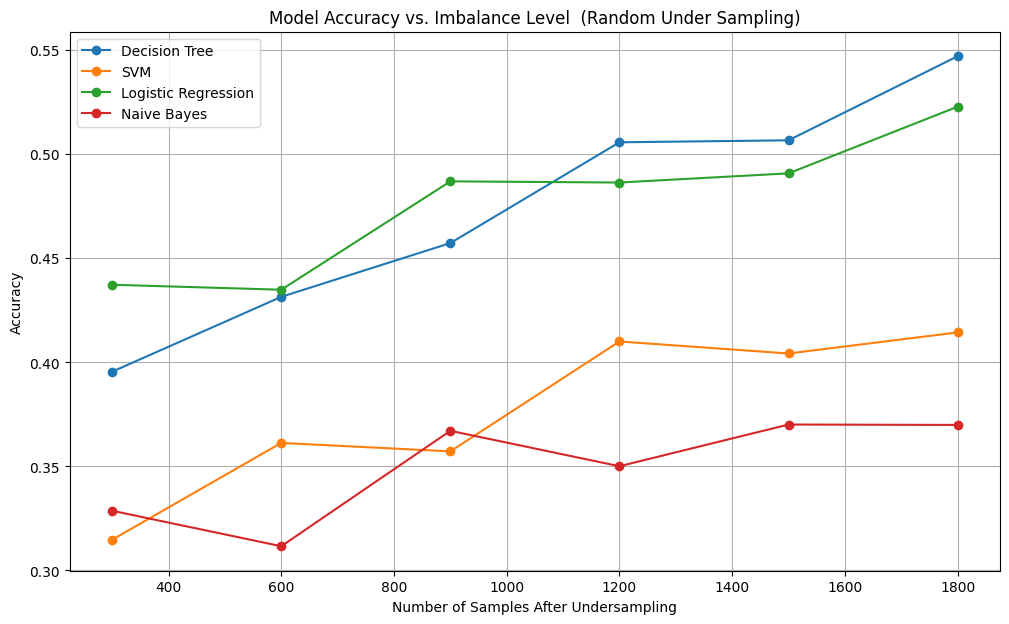

In [18]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(imbalance_levels, accuracies, label=name, marker="o")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model Accuracy vs. Imbalance Level  (Random Under Sampling)")
plt.xlabel("Number of Samples After Undersampling")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

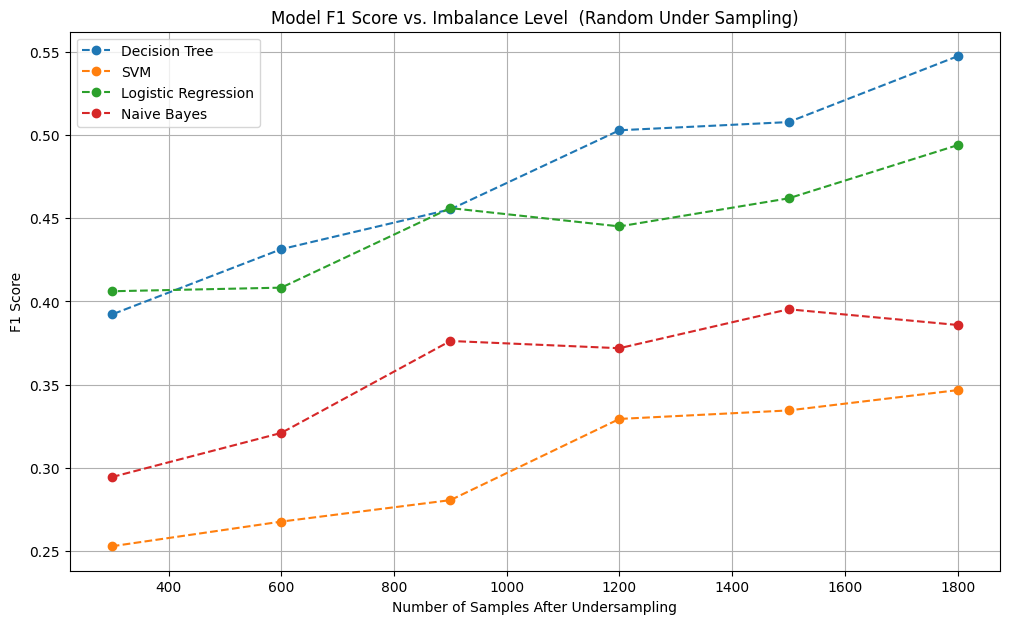

In [19]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, f1_scores in f1_score_results.items():
    plt.plot(imbalance_levels, f1_scores, label=name, marker="o", linestyle="--")

plt.title(f"Model F1 Score vs. Imbalance Level  (Random Under Sampling)")
plt.xlabel("Number of Samples After Undersampling")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# ...

# for sampler_name, sampler in undersamplers.items():
#     print(f"\n\nUsing {sampler_name}\n{'-'*50}")
accuracy_results = {name: [] for name in classifiers}
f1_score_results = {name: [] for name in classifiers}
strategies = ['all', 'auto', 'not minority', 'not majority', 'majority']

for strategy in strategies:
    print(f"\n\nTesting for imbalance level: {level} samples\n{'-'*50}")

    # if sampler_name == "Random UnderSampler":
    # strategy = {5: level, 6: level, 7: int(level/2)}
    sampler = EditedNearestNeighbours(sampling_strategy=strategy)
    X_resampled, y_resampled = sampler.fit_resample(X, y)
    # elif sampler_name == "Edited Nearest Neighbours":
    #     sampler = EditedNearestNeighbours(sampling_strategy=strategy)
    #     X_resampled, y_resampled = sampler.fit_resample(X, y)

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results[name].append(accuracy)
        f1_score_value = f1_score(y_test, predictions, average="weighted")
        f1_score_results[name].append(f1_score_value)
        print(f"F1-Score for {name}: {f1_score_value:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(f"Classification Report for {name}:\n", classification_report(y_test, predictions))
        print('-'*50)



Testing for imbalance level: 300 samples
--------------------------------------------------
F1-Score for Decision Tree: 0.7849
Accuracy for Decision Tree: 0.7848
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           5       0.77      0.79      0.78       143
           6       0.82      0.76      0.78       188
           7       0.70      0.87      0.78        46
           8       1.00      1.00      1.00         4

    accuracy                           0.78       381
   macro avg       0.82      0.85      0.84       381
weighted avg       0.79      0.78      0.78       381

--------------------------------------------------
F1-Score for SVM: 0.5071
Accuracy for SVM: 0.5591
Classification Report for SVM:
               precision    recall  f1-score   support

           5       0.53      0.42      0.47       143
           6       0.57      0.81      0.67       188
           7       0.00      0.00      0.00        46
         

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.6277
Accuracy for Logistic Regression: 0.6693
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           5       0.68      0.72      0.70       143
           6       0.67      0.80      0.73       188
           7       0.25      0.02      0.04        46
           8       0.00      0.00      0.00         4

    accuracy                           0.67       381
   macro avg       0.40      0.39      0.37       381
weighted avg       0.62      0.67      0.63       381

--------------------------------------------------
F1-Score for Naive Bayes: 0.5920
Accuracy for Naive Bayes: 0.6010
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           5       0.68      0.58      0.63       143
           6       0.59      0.71      0.64       188
           7       0.30      0.20      0.24        46
           8       1.00      1.00      1.00         4

    ac

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.6482
Accuracy for Logistic Regression: 0.6859
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           5       0.69      0.71      0.70       141
           6       0.69      0.82      0.75       197
           7       0.33      0.03      0.05        37
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1

    accuracy                           0.69       382
   macro avg       0.34      0.31      0.30       382
weighted avg       0.64      0.69      0.65       382

--------------------------------------------------
F1-Score for Naive Bayes: 0.5933
Accuracy for Naive Bayes: 0.5759
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           5       0.68      0.55      0.61       141
           6       0.61      0.64      0.63       197
           7       0.32      0.27      0.29        37
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetric

F1-Score for Logistic Regression: 0.6482
Accuracy for Logistic Regression: 0.6859
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           5       0.69      0.71      0.70       141
           6       0.69      0.82      0.75       197
           7       0.33      0.03      0.05        37
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1

    accuracy                           0.69       382
   macro avg       0.34      0.31      0.30       382
weighted avg       0.64      0.69      0.65       382

--------------------------------------------------
F1-Score for Naive Bayes: 0.5933
Accuracy for Naive Bayes: 0.5759
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           5       0.68      0.55      0.61       141
           6       0.61      0.64      0.63       197
           7       0.32      0.27      0.29        37
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.7508
Accuracy for Logistic Regression: 0.8092
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           4       0.50      1.00      0.67         1
           5       0.44      0.10      0.17       145
           6       0.82      0.98      0.89       845
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         0

    accuracy                           0.81      1038
   macro avg       0.35      0.42      0.35      1038
weighted avg       0.73      0.81      0.75      1038

--------------------------------------------------
F1-Score for Naive Bayes: 0.7607
Accuracy for Naive Bayes: 0.7592
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           4       1.00      1.00      1.00         1
           5       0.35      0.37      0.36       145
           6       0.86      0.85      0.86       845
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

F1-Score for SVM: 0.3254
Accuracy for SVM: 0.4911
Classification Report for SVM:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        70
           5       0.49      1.00      0.66       633
           6       0.00      0.00      0.00       201
           7       0.67      0.01      0.01       314
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00         1

    accuracy                           0.49      1293
   macro avg       0.17      0.14      0.10      1293
weighted avg       0.40      0.49      0.33      1293

--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-Score for Logistic Regression: 0.5181
Accuracy for Logistic Regression: 0.6063
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       1.00      0.08      0.14        13
           4       0.00      0.00      0.00        70
           5       0.66      0.88      0.75       633
           6       0.25      0.01      0.02       201
           7       0.52      0.71      0.60       314
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1293
   macro avg       0.35      0.24      0.22      1293
weighted avg       0.50      0.61      0.52      1293

--------------------------------------------------
F1-Score for Naive Bayes: 0.4862
Accuracy for Naive Bayes: 0.4795
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.15      0.23      0.18        13
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetric

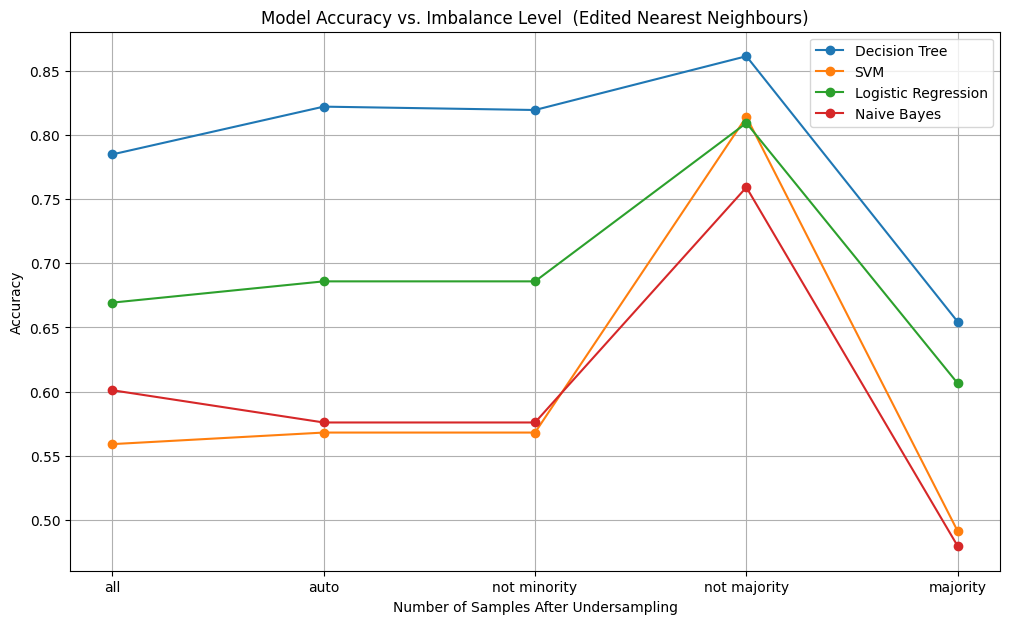

In [21]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(strategies, accuracies, label=name, marker="o")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model Accuracy vs. Imbalance Level  (Edited Nearest Neighbours)")
plt.xlabel("Number of Samples After Undersampling")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

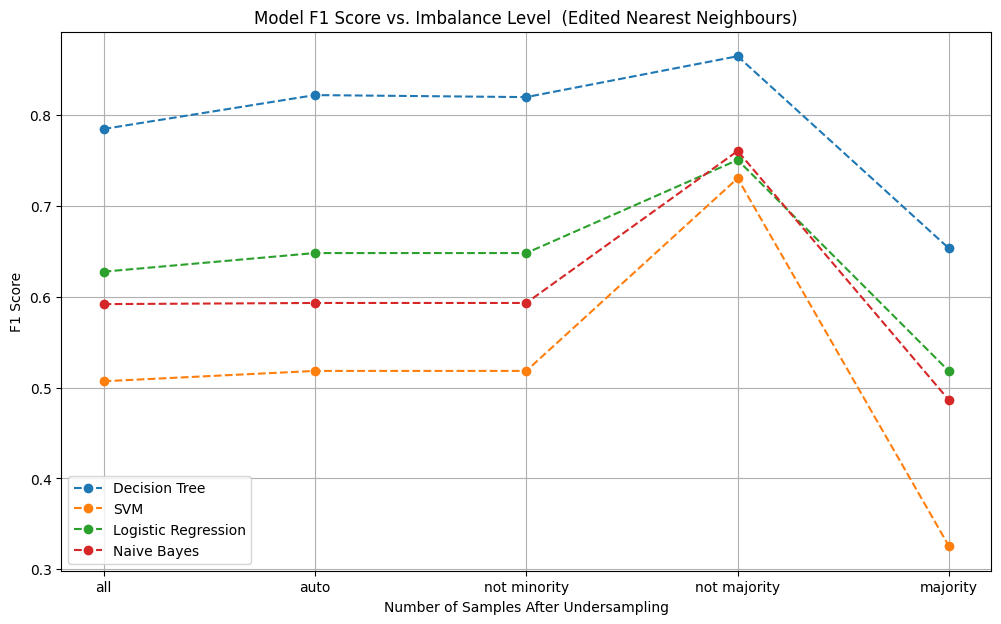

In [22]:
# Plotting the results for each undersampler
plt.figure(figsize=(12, 7))
for name, f1_scores in f1_score_results.items():
    plt.plot(strategies, f1_scores, label=name, marker="o", linestyle="--")

# plt.title(f"Model Accuracy vs. Imbalance Level ({sampler_name})")
plt.title(f"Model F1 Score vs. Imbalance Level  (Edited Nearest Neighbours)")
plt.xlabel("Number of Samples After Undersampling")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()